# TensorFlow Tutorials
# ML Basics 05 - Overfitting and Underfitting

**Overfitting** occurs when the model overoptimizes its parameters to achieve a lower loss on the training set, and in doing so does not learn relationships that generalize well to data it has never seen before e.g. the validation and test sets. 

Overfitting occurs if
- The training set is too small.
- The model has not been regularized. 
    - By enforcing regularization, we limit the number of patterns the model can memorize. In doing so, we implicitly force it to focus on the most prominent patterns. 
- The model is trained for too many epochs. 

**Underfitting** occurs if there is still room for improvement: the model's weights can be further optimized to achieve better performance on training, test, and validation sets.

Underfitting occurs if 
- The model is overregularized.
- Insufficient training examples.
- Model hasn't been trained on enough epochs. 

## Workspace Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
# Try importing tensorflow 2.0
try:
    #%tensorflow_version only exists in CoLab
    %tensorflow_version 2.x
except Exception:
    pass

In [13]:
# Tensorflow backend, Keras API
import tensorflow as tf
from tensorflow import keras

In [5]:
# Helper libraries
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
# Which version of tf are we using
print(tf.__version__)

1.10.0


## Downloading Dataset

To demonstrate the effects of overfitting, we will use one-hot encoding for our training data. Each sequence of integers representing a review will be one-hot encoded: transformed into a 10k dimensional vector where only the indices corresponding to the integers in the review are 1, the rest are 0.

Such vectors are more likely to overfit. 

In [7]:
# Limiting ourselves to 10k most commonly occurring words
NUM_WORDS = 10000

# Temporarily using old version of numpy to load pickle file 
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [8]:
# Defining a function for one-hot encoding of training and test data
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # set specific indices of results[i] to 1
    
    return results

In [9]:
# Calling function for one-hot encoding
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

## Visualizing Training Data

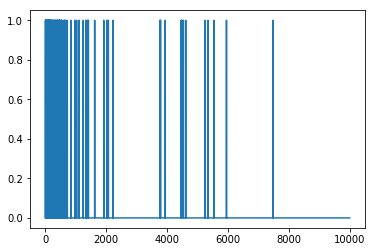

In [10]:
plt.plot(train_data[0])

The training example is a 10000 dimensional vector. Every blue bar represents the presence of a specific word at that index in the entire 10k-dimensional bag of words. 

Because we imported the 10k most commonly occurring words and because these words were sorted in order of frequency, more frequently occurring words are at lower indices. This is why the earlier indices have more blue bars.

## Demonstrate Overfitting

Overfitting occurs when the model has high memorization capacity: too many learnable parameters make it possible for the model to learn a dictionary-like one-to-one mapping between training examples and their corresponding labels. 

However, if the model has too few hidden layers or too few activation units per hidden layer, it has too low a memorization capacity. It may not be able to learn a sufficiently complex higher dimensional representation of the data. 

Need to find right size for the model through trial and error.

In [18]:
# Baseline model
baseline_model = keras.Sequential([
    # `input_shape` iso nly required here so that .summary() call later will work
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile
baseline_model.compile(optimizer='adam', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy', 'binary_crossentropy'])

In [19]:
# Model layers, params, I/Os
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [21]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20, 
                                      batch_size=512,
                                      validation_data=(test_data, test_labels), 
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4555 - acc: 0.8185 - binary_crossentropy: 0.4555 - val_loss: 0.3209 - val_acc: 0.8799 - val_binary_crossentropy: 0.3209
Epoch 2/20
 - 4s - loss: 0.2372 - acc: 0.9146 - binary_crossentropy: 0.2372 - val_loss: 0.2843 - val_acc: 0.8873 - val_binary_crossentropy: 0.2843
Epoch 3/20
 - 3s - loss: 0.1768 - acc: 0.9386 - binary_crossentropy: 0.1768 - val_loss: 0.2916 - val_acc: 0.8838 - val_binary_crossentropy: 0.2916
Epoch 4/20
 - 3s - loss: 0.1412 - acc: 0.9522 - binary_crossentropy: 0.1412 - val_loss: 0.3187 - val_acc: 0.8786 - val_binary_crossentropy: 0.3187
Epoch 5/20
 - 3s - loss: 0.1152 - acc: 0.9629 - binary_crossentropy: 0.1152 - val_loss: 0.3456 - val_acc: 0.8738 - val_binary_crossentropy: 0.3456
Epoch 6/20
 - 3s - loss: 0.0921 - acc: 0.9728 - binary_crossentropy: 0.0921 - val_loss: 0.3787 - val_acc: 0.8703 - val_binary_crossentropy: 0.3787
Epoch 7/20
 - 2s - loss: 0.0726 - acc: 0.9805 - binary_crossentropy:

## Smaller Model
Has the same number of layers but fewer hidden units per layer. 

In [25]:
# Instantiate
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile
smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy', 
                     metrics=['accuracy', 'binary_crossentropy'])

# Model layers, OPs, params
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Train model
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels), 
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6156 - acc: 0.7353 - binary_crossentropy: 0.6156 - val_loss: 0.5340 - val_acc: 0.8353 - val_binary_crossentropy: 0.5340
Epoch 2/20
 - 3s - loss: 0.4473 - acc: 0.8710 - binary_crossentropy: 0.4473 - val_loss: 0.4111 - val_acc: 0.8684 - val_binary_crossentropy: 0.4111
Epoch 3/20
 - 3s - loss: 0.3399 - acc: 0.8946 - binary_crossentropy: 0.3399 - val_loss: 0.3440 - val_acc: 0.8802 - val_binary_crossentropy: 0.3440
Epoch 4/20
 - 3s - loss: 0.2736 - acc: 0.9121 - binary_crossentropy: 0.2736 - val_loss: 0.3073 - val_acc: 0.8851 - val_binary_crossentropy: 0.3073
Epoch 5/20
 - 3s - loss: 0.2285 - acc: 0.9256 - binary_crossentropy: 0.2285 - val_loss: 0.2910 - val_acc: 0.8869 - val_binary_crossentropy: 0.2910
Epoch 6/20
 - 3s - loss: 0.1970 - acc: 0.9351 - binary_crossentropy: 0.1970 - val_loss: 0.2832 - val_acc: 0.8891 - val_binary_crossentropy: 0.2832
Epoch 7/20
 - 3s - loss: 0.1738 - acc: 0.9440 - binary_crossentropy:

## Bigger Model
Creating an even larger model with a much larger capacity. This will definitely overfit. 

In [28]:
# Instantiate
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile
bigger_model.compile(optimizer='adam', 
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

# Summary
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [30]:
bigger_history = bigger_model.fit(train_data, train_labels, 
                                 epochs=20, 
                                 batch_size=512, 
                                 validation_data=(test_data, test_labels), 
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 16s - loss: 9.4430e-05 - acc: 1.0000 - binary_crossentropy: 9.4430e-05 - val_loss: 0.7756 - val_acc: 0.8718 - val_binary_crossentropy: 0.7756
Epoch 2/20
 - 16s - loss: 7.4070e-05 - acc: 1.0000 - binary_crossentropy: 7.4070e-05 - val_loss: 0.7889 - val_acc: 0.8718 - val_binary_crossentropy: 0.7889
Epoch 3/20
 - 15s - loss: 6.0128e-05 - acc: 1.0000 - binary_crossentropy: 6.0128e-05 - val_loss: 0.8013 - val_acc: 0.8719 - val_binary_crossentropy: 0.8013
Epoch 4/20
 - 15s - loss: 4.9921e-05 - acc: 1.0000 - binary_crossentropy: 4.9921e-05 - val_loss: 0.8112 - val_acc: 0.8719 - val_binary_crossentropy: 0.8112
Epoch 5/20
 - 15s - loss: 4.2155e-05 - acc: 1.0000 - binary_crossentropy: 4.2155e-05 - val_loss: 0.8203 - val_acc: 0.8717 - val_binary_crossentropy: 0.8203
Epoch 6/20
 - 15s - loss: 3.6142e-05 - acc: 1.0000 - binary_crossentropy: 3.6142e-05 - val_loss: 0.8292 - val_acc: 0.8715 - val_binary_crossentropy: 0.8292
Epoch 7/20
 - 

## Recap
We trained three models, each with three layers but different number of activation units per hidden layer. Thus, these models had different capacities and thus different potentials for overfitting.
- small: 4 units
- baseline: 16 units
- large: 512 units

In [31]:
# Plotting the validation and training set cross entropies

In [32]:
def plot_history(histories, key='binary_crossentropy'):
    # Create a new figure with the specified dimensions
    plt.figure(figsize=(16, 10))
    
    # For every history object and label 'name' in the list of histories passed to the function
    for name, history in histories:
        # Plot the validation set binary crossentropy or key specified
        val = plt.plot(history.epoch, history.history['val_' + key], 
                      '--', label=name.title()+' Val')
        
        # Then plot the same key but for the training set 
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), 
                label=name.title()+' Train')

    # Annotate the plot
    plt.xlabel('Epochs')

    # In the y label, replace the key with the 
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

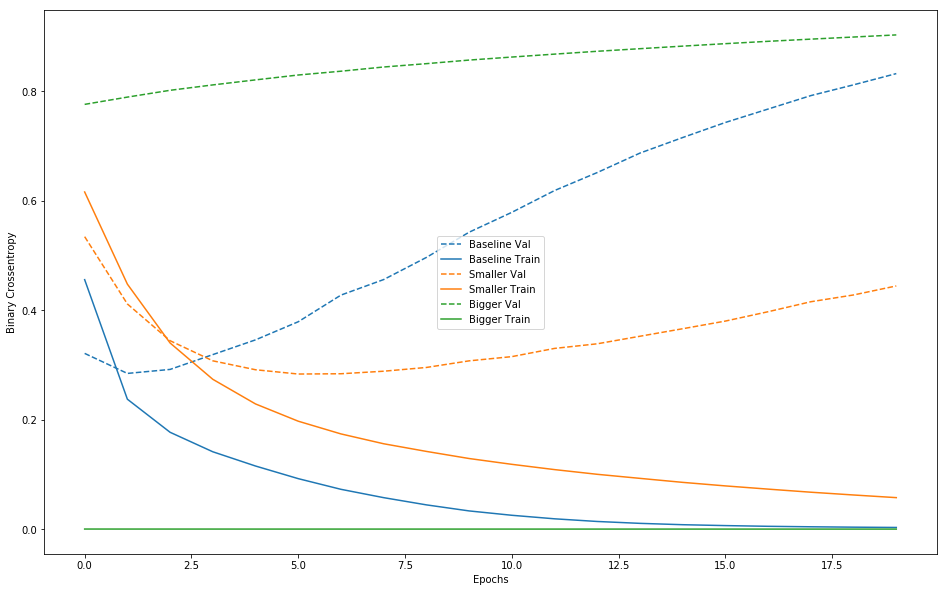

In [33]:
# Call the function with a list of tuples - first is name, second is actual history object
plot_history([('baseline', baseline_history),
               ('smaller', smaller_history),
              ('bigger', bigger_history)])

## Observations
- The larger model begins to overfit almost immediately. Its training set error is almost zero from the beginning of the training process, and its validation error is consistently the highest. This model has the poorest generalization ability.
- The baseline also overfits, although not as quickly as the larger model.
- The best performance seems to come from the smallest model: it has the lowest validation set error (despite overfitting).
- The disparity between training and validation set errors is substantial in all three models, implying that all three models suffer from high variance.

## Regularization
- Constrain network complexity by forcing its weights to only take small values. 
- This makes the distribution of weights more "regular". 
- Add L1 or L2 regularization to the model's cost function. 
    - L1: cost is proportional to the absolute value of the parameter values.
    - L2: cost is proportional to the square of the parameter values.

In [39]:
# Instantiating a model with L2 regularization
L2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), 
                      activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [40]:
# Compile
L2_model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy', 'binary_crossentropy'])

In [41]:
# Train
L2_model_history = L2_model.fit(train_data, train_labels, 
                               epochs=20,
                               batch_size=512, 
                               validation_data=(test_data, test_labels), 
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5567 - acc: 0.8058 - binary_crossentropy: 0.5211 - val_loss: 0.4214 - val_acc: 0.8617 - val_binary_crossentropy: 0.3849
Epoch 2/20
 - 3s - loss: 0.3346 - acc: 0.8970 - binary_crossentropy: 0.2921 - val_loss: 0.3482 - val_acc: 0.8810 - val_binary_crossentropy: 0.3011
Epoch 3/20
 - 3s - loss: 0.2729 - acc: 0.9215 - binary_crossentropy: 0.2226 - val_loss: 0.3345 - val_acc: 0.8878 - val_binary_crossentropy: 0.2819
Epoch 4/20
 - 3s - loss: 0.2454 - acc: 0.9338 - binary_crossentropy: 0.1910 - val_loss: 0.3401 - val_acc: 0.8852 - val_binary_crossentropy: 0.2845
Epoch 5/20
 - 3s - loss: 0.2293 - acc: 0.9405 - binary_crossentropy: 0.1724 - val_loss: 0.3500 - val_acc: 0.8821 - val_binary_crossentropy: 0.2924
Epoch 6/20
 - 3s - loss: 0.2178 - acc: 0.9456 - binary_crossentropy: 0.1591 - val_loss: 0.3633 - val_acc: 0.8788 - val_binary_crossentropy: 0.3040
Epoch 7/20
 - 3s - loss: 0.2084 - acc: 0.9490 - binary_crossentropy:

Every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient^2 to the total loss of the network. This will coerce the model to optimise its weights while still maintaing smaller values.

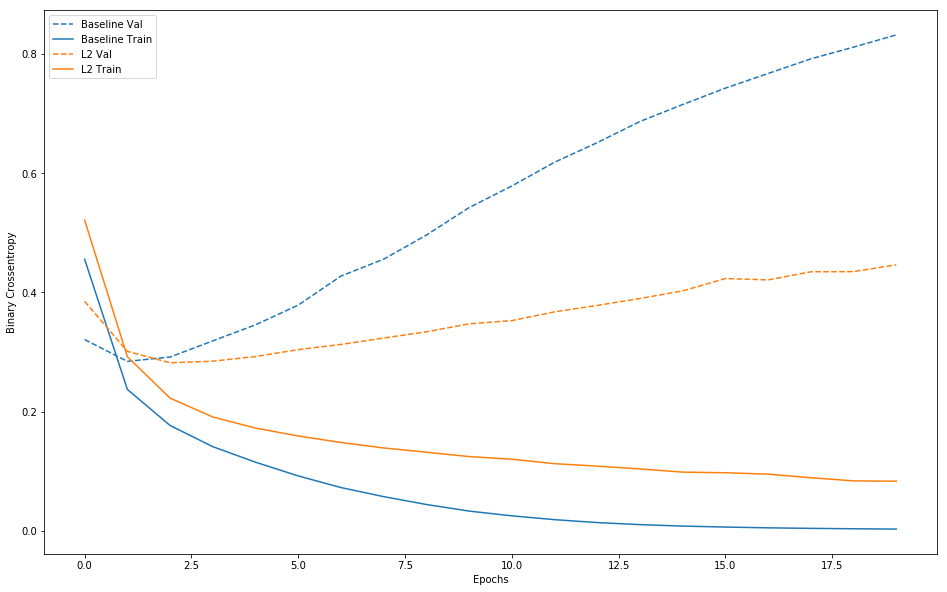

In [42]:
plot_history([('baseline', baseline_history), 
             ('l2', L2_model_history)])

Even though both models have the same number of parameters, the baseline model is more susceptible to overfitting, as is evident from its higher validation error. 

## Dropout
Randomly setting a fixed number of the outputs or activations of a layer to 0. This helps minimise the effect of random patterns on the predicting power of the model. 

At test time, the model weights are scaled down by the proportion of weights that were set to 0 during test time.

In [44]:
dpt_model = keras.models.Sequential([
    # Input layer and dropout
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dropout(0.5),
    
    # Hidden layer and dropout
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    
    # Output layer does not have dropout
    keras.layers.Dense(1, activation='sigmoid')
])

In [46]:
# Compile
dpt_model.compile(optimizer='adam', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy', 'binary_crossentropy'])

In [47]:
# Fit model
dpt_model_history = dpt_model.fit(train_data, train_labels, 
                                 epochs=20, 
                                 batch_size=512, 
                                 validation_data=(test_data, test_labels), 
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6187 - acc: 0.6462 - binary_crossentropy: 0.6187 - val_loss: 0.4893 - val_acc: 0.8543 - val_binary_crossentropy: 0.4893
Epoch 2/20
 - 3s - loss: 0.4644 - acc: 0.8015 - binary_crossentropy: 0.4644 - val_loss: 0.3647 - val_acc: 0.8778 - val_binary_crossentropy: 0.3647
Epoch 3/20
 - 3s - loss: 0.3676 - acc: 0.8610 - binary_crossentropy: 0.3676 - val_loss: 0.2983 - val_acc: 0.8867 - val_binary_crossentropy: 0.2983
Epoch 4/20
 - 3s - loss: 0.3038 - acc: 0.8887 - binary_crossentropy: 0.3038 - val_loss: 0.2789 - val_acc: 0.8884 - val_binary_crossentropy: 0.2789
Epoch 5/20
 - 3s - loss: 0.2637 - acc: 0.9112 - binary_crossentropy: 0.2637 - val_loss: 0.2783 - val_acc: 0.8874 - val_binary_crossentropy: 0.2783
Epoch 6/20
 - 3s - loss: 0.2277 - acc: 0.9209 - binary_crossentropy: 0.2277 - val_loss: 0.2860 - val_acc: 0.8866 - val_binary_crossentropy: 0.2860
Epoch 7/20
 - 3s - loss: 0.2030 - acc: 0.9315 - binary_crossentropy:

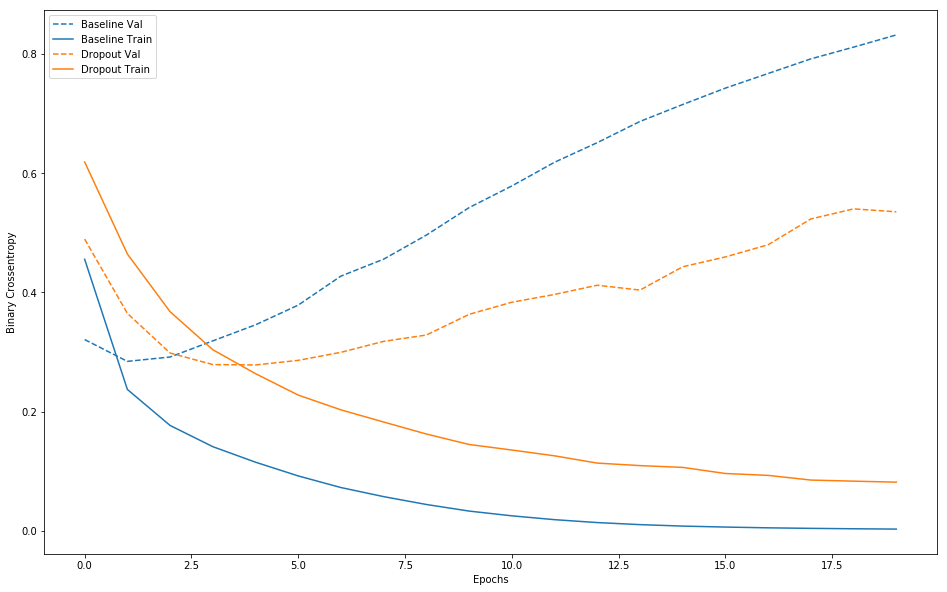

In [48]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

Dropout has also achieved signifcant overfitting resistance compared to the baseline model.